### Import das bibliotecas

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import io
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Leitura da base

In [ ]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['rigidez.csv']), sep=';')

Saving rigidez.csv to rigidez (2).csv


In [ ]:
uploaded = files.upload()
df_enem = pd.read_csv(io.BytesIO(uploaded['enem_2019_tratado.csv']), sep=',', encoding='iso-8859-1')

Saving enem_2019_tratado.csv to enem_2019_tratado (2).csv


In [ ]:
uploaded = files.upload()
df_comissao = pd.read_excel(io.BytesIO(uploaded['comissao.xlsx']))

Saving comissao.xlsx to comissao.xlsx


In [ ]:
uploaded = files.upload()
df_doencas = pd.read_csv(io.BytesIO(uploaded['casos_obitos_doencas_preexistentes.csv']), sep=',', encoding='utf-8')

### Tratamento da base

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cargas  30 non-null     int64  
 1   forca   30 non-null     float64
 2   Lo      30 non-null     float64
 3   L       29 non-null     float64
 4   x       29 non-null     float64
 5   K       29 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.5 KB


In [ ]:
df['x'].fillna(df['x'].mean(), inplace=True)

In [ ]:
boxplot = px.box(df, y='x')
boxplot.show()

In [ ]:
df = df[df['x'] != 1.89100].copy()

In [ ]:
df

,cargas,forca,Lo,L,x,K
0,1,0.10,27.0,29.90,0.00290,34.48
1,2,0.15,27.0,31.30,0.00430,34.88
2,3,0.18,27.0,NaN,0.11205,NaN
3,4,0.23,27.0,34.00,0.00700,32.86
4,5,0.31,27.0,35.53,0.00850,36.34
5,6,0.45,27.0,41.40,0.01440,31.25
6,7,0.55,27.0,44.20,0.01720,31.98
7,8,0.68,27.0,47.20,0.02020,33.66
8,9,0.72,27.0,50.00,0.02300,31.30
9,10,0.83,27.0,51.90,0.02490,33.33


### Análise se distribuição é normal

In [ ]:
# teste de shapiro
# distribuição normal: p > 0.05
# distribuição != normal: p <= 0.05
stats.shapiro(df.forca)

ShapiroResult(statistic=0.9500337839126587, pvalue=0.183413565158844)

### Correlação

In [ ]:
coef, p = stats.pearsonr(df.forca, df.x)
print('coef', coef)
print('p', p)

coef 0.8038725787144504
p 1.5039351184578393e-07


In [ ]:
correlacoes = df.corr(method='pearson')
correlacoes

,cargas,forca,Lo,L,x,K
cargas,1.000000,0.997232,NaN,0.995672,0.795059,-0.728749
forca,0.997232,1.000000,NaN,0.999079,0.803873,-0.713098
Lo,NaN,NaN,NaN,NaN,NaN,NaN
L,0.995672,0.999079,NaN,1.000000,1.000000,-0.730160
x,0.795059,0.803873,NaN,1.000000,1.000000,-0.730224
K,-0.728749,-0.713098,NaN,-0.730160,-0.730224,1.000000


### Regressão linear com Statsmodels

In [ ]:
regressao = smf.ols('forca ~ x', data = df).fit()

In [ ]:
residuos = regressao.resid

In [ ]:
# até 5k amostras
estatistica, p = stats.shapiro(residuos)
print('estatistica', estatistica)
print('p', p)

estatistica 0.5275372266769409
p 1.5297004551939608e-08


### Análise de homocedasticidade

In [ ]:
# homocedasticidade relacionado a distribuição dos residuos homogenea ou não / variação constante
# teste de breusch-pagan
# existe homocedasticidade: p > 0.05
# não existe homocedasticidade != normal: p <= 0.05
estatistica, p, f, fp = sms.het_breuschpagan(regressao.resid, regressao.model.exog)
print('estatistica', estatistica)
print('p-valor', p)

estatistica 4.467561823234998
p-valor 0.03454425197789337


In [ ]:
regressao.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  forca   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     49.32
Date:                Wed, 24 May 2023   Prob (F-statistic):           1.50e-07
Time:                        14:00:51   Log-Likelihood:                -24.022
No. Observations:                  29   AIC:                             52.04
Df Residuals:                      27   BIC:                             54.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2742      0.200      1.370      0.182      -0.137       0.685
x             23.4733      3.343      7.023      0.000      16.615      30.332
==============================================================================
Omnibus:                       57.963   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              436.984
Skew:                          -4.020   Prob(JB):                     1.29e-95
Kurtosis:                      20.234   Cond. No.                         31.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

estatistica t:

H0 = coeficiente igual a zero: p > 0,05(coeficiente não validado)

Ha = coeficiente diferente de zero: p <= 0,05(coeficiente validado)

R^2 ajustado:

Coeficiente de determinação

Equação do modelo de regressão: Força = 1,4430 + 1,0905.x

R^2 ajustado = 0,120


In [ ]:
maximo = max(df['x'])
df = df[df['x'] < maximo].copy()

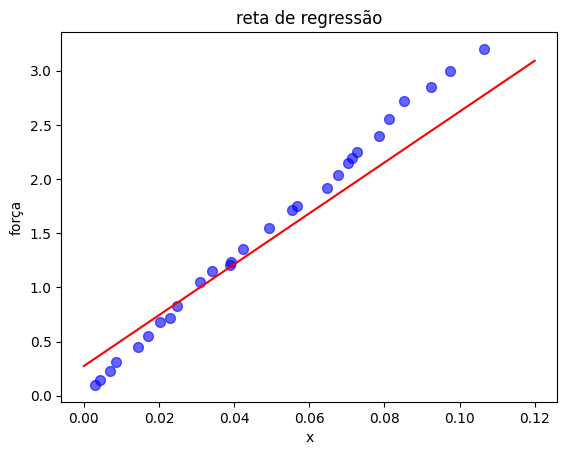

In [ ]:
plt.scatter(y=df.forca, x=df.x, color='blue', s=50, alpha=0.6)
X_plot = np.linspace(0, 0.12)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('reta de regressão')
plt.ylabel('força')
plt.xlabel('x')
plt.show()

In [ ]:
# predição
df_test = pd.DataFrame({'x': [0.06, 0.07, 0.08]})

# Dados de teste (para fazer a previsão)
predictions = regressao.predict(df_test)

print(predictions)

0    1.682631
1    1.917364
2    2.152097
dtype: float64


### Regressão Linear Múltipla com Statsmodel

Pressupostos

1. Relação linear entre variáveis independentes e dependentes
2. Sem presença de outliers na análise dos resíduos
3. Passar no teste de homocedasticidade
4. Resíduos normalmente distribuídos com média 0 e variância constante
5. Ausência de multicolinearidade e autocorrelação

Se não atender algum ponto acima, deve-se buscar outro tipo de regressão

In [ ]:
colegio_x = df_enem.loc[df_enem.CO_ESCOLA == 35132287]

In [ ]:
modelo = smf.ols('NOTA_REDACAO ~ COMP2 + COMP3 + COMP4 + COMP5', data=colegio_x).fit()

In [ ]:
residuos = modelo.resid
residuos

17        12.947725
10760     13.278001
13315      2.975488
20006    -14.177010
26697     -9.803121
            ...    
426829    12.382661
428241   -11.968031
443242   -10.325663
462446   -28.803148
483420    23.250238
Length: 130, dtype: float64

### teste de normalidade dos residuos
H0 = coeficiente igual a zero: p > 0,05(coeficiente não validado)

Ha = coeficiente diferente de zero: p <= 0,05(coeficiente validado)

In [ ]:
estatistica, p = stats.shapiro(residuos)
print('estatistica', estatistica)
print('p', p)

estatistica 0.9814485311508179
p 0.07262612879276276


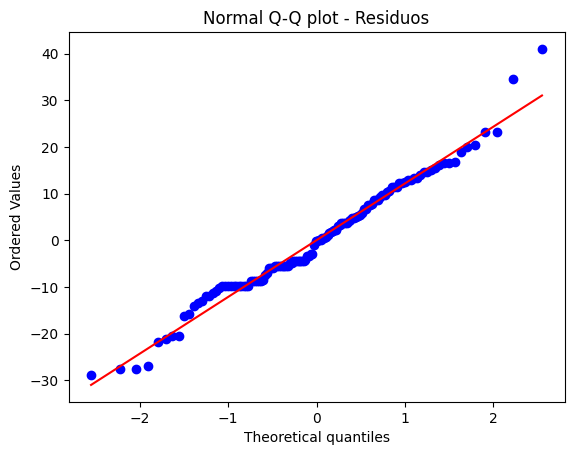

In [ ]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Normal Q-Q plot - Residuos')
plt.show()

### Análise de Homocedasticidade dos residuos
residuos com variação constante

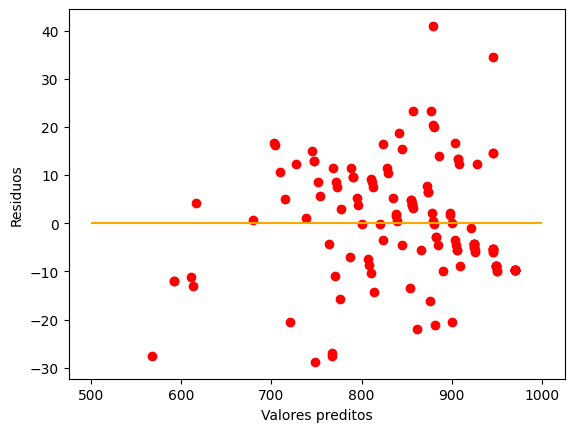

In [ ]:
plt.scatter(y=residuos, x=modelo.predict(), color='red')
plt.hlines(y=0, xmin=500, xmax=1000, color='orange')
plt.ylabel('Residuos')
plt.xlabel('Valores preditos')
plt.show()

Teste Breusch-Pagan (Homocedasticidade)

H0 = existe homocedasticidade: p > 0,05(coeficiente não validado)

Ha = não existe homocedasticidade: p <= 0,05(coeficiente validado)


In [ ]:
estatistica, p, f, fp = sms.het_breuschpagan(modelo.resid, modelo.model.exog)
print('estatistica do teste', estatistica)
print('p-valor', p)

estatistica do teste 4.643193683691794
p-valor 0.32590439806602367


#### Outilier nos residuos

In [ ]:
outliers = modelo.outlier_test()

In [ ]:
outliers.max()

student_resid    3.555577
unadj_p          0.997635
bonf(p)          1.000000
dtype: float64

In [ ]:
outliers.min()

student_resid   -2.461759
unadj_p          0.000535
bonf(p)          0.069520
dtype: float64

### Ausência de multicolinearidade

Somente entre as variáveis indepedentes

Considera multicolinearidade quando r > 0.9

In [ ]:
variaveis = colegio_x[['COMP2', 'COMP4', 'COMP5']]

In [ ]:
correlacoes = variaveis.corr(method='pearson')
correlacoes

,COMP2,COMP4,COMP5
COMP2,1.000000,0.375906,0.298434
COMP4,0.375906,1.000000,0.428872
COMP5,0.298434,0.428872,1.000000


### Análise do modelo

Intercept

p-valor(P>|t|) para cada coeficiente < 0.05 (estatisticamente significativos)

R^2 ajustado (explicação do modelo através do dados) * ajustado pois faz um ajuste quando tem mais de uma variável

p-valor da estatistica F < 0.05 (valida o modelo de regressão)

In [ ]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:           NOTA_REDACAO   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1759.
Date:                Thu, 25 May 2023   Prob (F-statistic):          8.14e-109
Time:                        19:45:37   Log-Likelihood:                -508.26
No. Observations:                 130   AIC:                             1027.
Df Residuals:                     125   BIC:                             1041.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     77.7830      9.379      8.294      0.0

Equação(coeficientes): Nota Redação = 116.1987 + 1.2831*COMP2 + 1.7298*COMP4 + 1.1993*COMP5

In [ ]:
# criando uma coluna com previsão
colegio_x['previsão'] = modelo.fittedvalues

<ipython-input-21-0f0ce77f43bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colegio_x['previsão'] = modelo.fittedvalues


In [ ]:
colegio_x.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,previsão
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim,747.052275
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,...,Inglês,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim,906.721999
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim,777.024512
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim,814.177010
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim,969.803121


### Regressão polinomial
ajuste de uma equação não linear por meio de funções polinomiais de variável independente

função de grau 1 seria uma regressão linear a partir do grau 2 se configura uma regressão não linear

para encontrar o ponto mínimo e máximo deriva y em relação a x: dy/dx = 0



In [ ]:
# valores faltosos
df_comissao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   quantidade  50 non-null     int64
 1   comissao    50 non-null     int64
dtypes: int64(2)
memory usage: 928.0 bytes


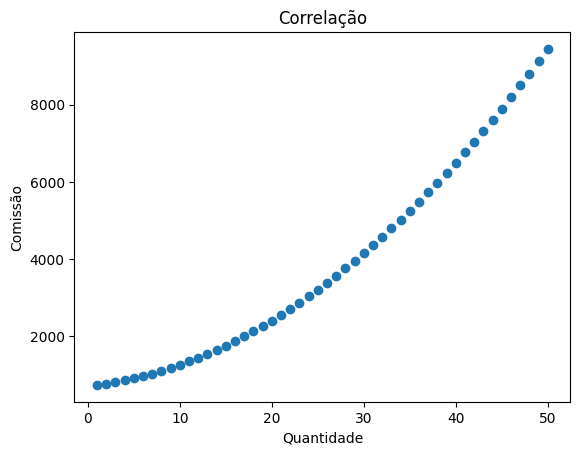

In [ ]:
plt.scatter(df_comissao.quantidade, df_comissao.comissao)
plt.title('Correlação')
plt.xlabel('Quantidade')
plt.ylabel('Comissão')
plt.grid(False)
plt.show()

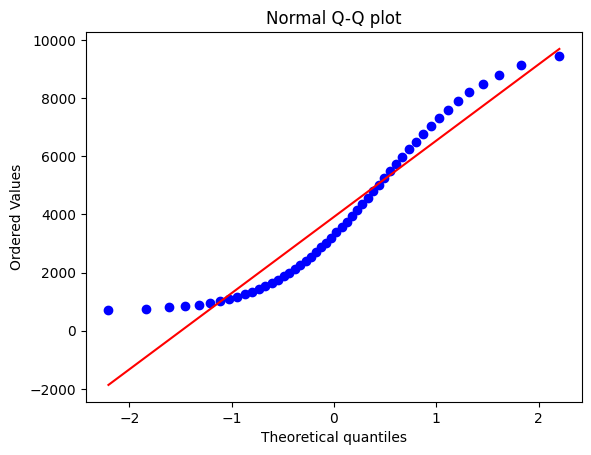

In [ ]:
# normalidade
stats.probplot(df_comissao['comissao'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

In [ ]:
estatistica, p = stats.shapiro(df_comissao.comissao)
print('estatistica', estatistica)
print('p', p)

estatistica 0.9124540090560913
p 0.0012719858204945922


### Correlação linear

In [ ]:
coef, p = stats.spearmanr(df_comissao.quantidade, df_comissao.comissao)
print('coef', coef)
print('p', p)

coef 0.9999999999999999
p 0.0


### Testando regressão linear

In [ ]:
regressao = smf.ols('comissao ~ quantidade', data = df_comissao).fit()

In [ ]:
regressao.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               comissao   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1016.
Date:                Thu, 25 May 2023   Prob (F-statistic):           5.98e-34
Time:                        21:09:53   Log-Likelihood:                -387.21
No. Observations:                  50   AIC:                             778.4
Df Residuals:                      48   BIC:                             782.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -626.0000    163.662     -3.825      0.000    -955.064    -296.936
quantidade   178.0000      5.586     31.867      0.000     166.769     189.231
==============================================================================
Omnibus:                        6.733   Durbin-Watson:                   0.023
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                4.932
Skew:                           0.635   Prob(JB):                       0.0849
Kurtosis:                       2.133   Cond. No.                         59.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Equação: comissão = -626 + 178*quantidade

** equação não tem sentido

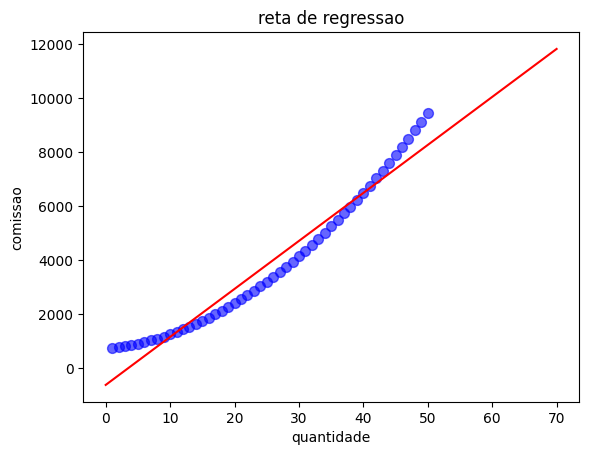

In [ ]:
plt.scatter(y=df_comissao.comissao, x=df_comissao.quantidade, color='blue', s=50, alpha=0.6)
X_plot = np.linspace(0, 70)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('reta de regressao')
plt.ylabel('comissao')
plt.xlabel('quantidade')
plt.show()

### Regressão polinomial com numpy - grau 2

y = b0 + b1*x + b2*x^2

In [ ]:
modelo = np.poly1d(np.polyfit(df_comissao.quantidade, df_comissao.comissao, 2))

In [ ]:
y = modelo(df_comissao.quantidade)
y

array([ 728.,  762.,  802.,  848.,  900.,  958., 1022., 1092., 1168.,
       1250., 1338., 1432., 1532., 1638., 1750., 1868., 1992., 2122.,
       2258., 2400., 2548., 2702., 2862., 3028., 3200., 3378., 3562.,
       3752., 3948., 4150., 4358., 4572., 4792., 5018., 5250., 5488.,
       5732., 5982., 6238., 6500., 6768., 7042., 7322., 7608., 7900.,
       8198., 8502., 8812., 9128., 9450.])

In [ ]:
modelo.coef

array([  3.,  25., 700.])

In [ ]:
print('Equação: comissao = ', modelo.coef[2], ' +', modelo.coef[1], '* quantidade + ', modelo.coef[0], '*quantidade ^ 2')

Equação: comissao =  699.9999999999989  + 24.999999999999954 * quantidade +  2.999999999999999 *quantidade ^ 2


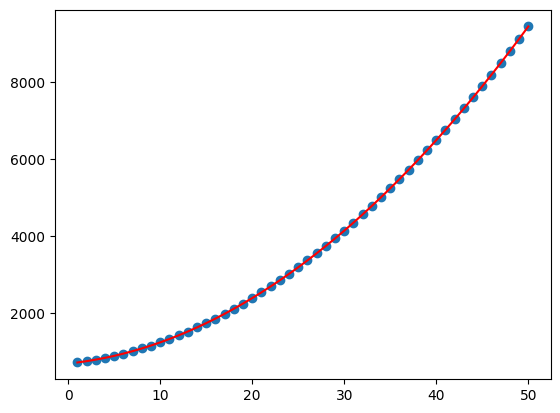

In [ ]:
plt.scatter(df_comissao.quantidade, df_comissao.comissao)
plt.plot(df_comissao.quantidade, y, color='red')

### Regressão polinomial com sklearn

In [ ]:
# pré processamento
pre_process = PolynomialFeatures(degree=2)

In [ ]:
x = df_comissao[['quantidade']]
y = df_comissao['comissao']

In [ ]:
x_poly = pre_process.fit_transform(x)
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00],
       [1.000e+00, 4.000e+00, 1.600e+01],
       [1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 6.000e+00, 3.600e+01],
       [1.000e+00, 7.000e+00, 4.900e+01],
       [1.000e+00, 8.000e+00, 6.400e+01],
       [1.000e+00, 9.000e+00, 8.100e+01],
       [1.000e+00, 1.000e+01, 1.000e+02],
       [1.000e+00, 1.100e+01, 1.210e+02],
       [1.000e+00, 1.200e+01, 1.440e+02],
       [1.000e+00, 1.300e+01, 1.690e+02],
       [1.000e+00, 1.400e+01, 1.960e+02],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 1.600e+01, 2.560e+02],
       [1.000e+00, 1.700e+01, 2.890e+02],
       [1.000e+00, 1.800e+01, 3.240e+02],
       [1.000e+00, 1.900e+01, 3.610e+02],
       [1.000e+00, 2.000e+01, 4.000e+02],
       [1.000e+00, 2.100e+01, 4.410e+02],
       [1.000e+00, 2.200e+01, 4.840e+02],
       [1.000e+00, 2.300e+01, 5.290e+02],
       [1.000e+00, 2.400e+01, 5.76

In [ ]:
# criar o modelo
modelo_sk = LinearRegression()

In [ ]:
modelo_sk.fit(x_poly, y)

LinearRegression()

In [ ]:
y_pred = modelo_sk.predict(x_poly)

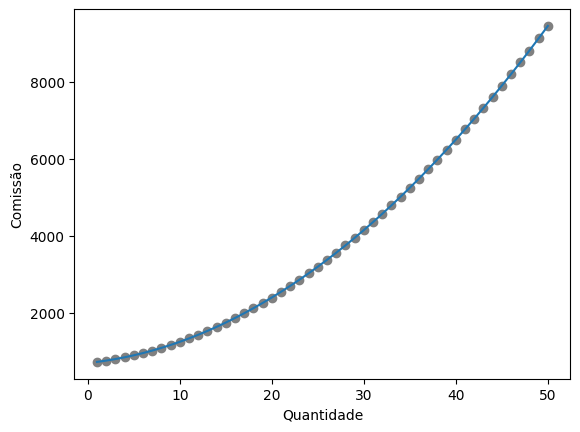

In [ ]:
plt.scatter(x, y, c = 'gray')
plt.xlabel('Quantidade')
plt.ylabel('Comissão')
plt.plot(x, y_pred)

In [ ]:
modelo_sk.coef_

array([ 0., 25.,  3.])

In [ ]:
modelo_sk.intercept_

700.0000000000059

In [ ]:
print('equação: comissão = {:.1f} + {:.1f}*quantidade + {:.1f}*quantidade^2'.format(modelo_sk.intercept_, modelo_sk.coef_[1], modelo_sk.coef_[2]))

equação: comissão = 700.0 + 25.0*quantidade + 3.0*quantidade^2


In [ ]:
# previsão
quantidade = 60
previsao = modelo_sk.predict(pre_process.fit_transform([[quantidade]]))
print("se vender {}, irá ganhar {:.2f} reais de comissão".format(quantidade, previsao[0]))

se vender 60, irá ganhar 13000.00 reais de comissão


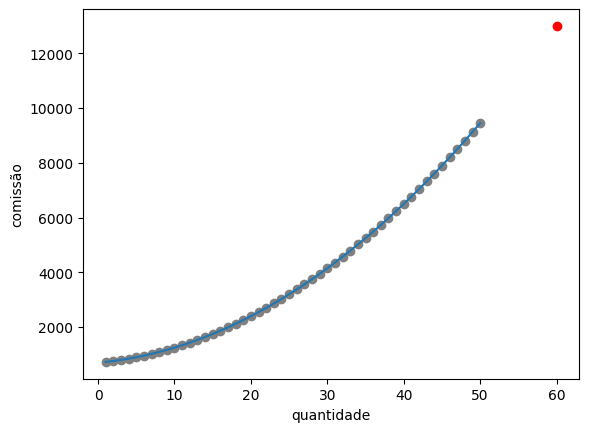

In [ ]:
plt.scatter(x, y, c='gray')
plt.xlabel('quantidade')
plt.ylabel('comissão')
plt.plot(x, y_pred)
plt.scatter(60, previsao, c= 'red')

In [ ]:
# avaliar o modelo
# MSE
mean_squared_error(y, y_pred)

7.633584584157331e-24

In [ ]:
# MAE
mean_absolute_error(y, y_pred)

2.3669599613640458e-12

### Regressão logística

In [ ]:
df_doencas.dropna(subset=['cs_sexo'], inplace=True)

In [ ]:
df_doencas = df_doencas[(df_doencas['cs_sexo'] != 'IGNORADO') & (df_doencas['cs_sexo'] != 'INDEFINIDO')].copy()

In [ ]:
px.pie(df_doencas, names='cs_sexo')

In [ ]:
df_doencas['obito'] = df_doencas['obito'].replace({0: 'nao', 1: 'sim'})

In [ ]:
df_doencas['cs_sexo'] = df_doencas['cs_sexo'].astype('category')
df_doencas['obito'] = df_doencas['obito'].astype('category')

### Modelo 1: uma variável independente

variável dependente binária(dicotômica)

categorias mutuamente exclusivas(uma pessoa não pode estar em duas situações)

independência das observações(sem medidas repetidas)

### Requisítos modelo

estatisticamente significativo: p <= 0.05

estatisticamente não é significativo: p > 0.05

análise de ausência de outlier e pontos de alavancagem

In [ ]:
modelo1 = smf.glm(formula='obito ~ cs_sexo', data=df_doencas, family=sm.families.Binomial()).fit()

In [ ]:
print(modelo1.summary())

In [ ]:
modelo1_params

In [ ]:
modelo_prova = smf.glm(formula='cs_sexo ~ obito', data=df_doencas, family=sm.families.Binomial()).fit()

In [ ]:
print(modelo_prova.summary())

In [ ]:
# razão de chance com intervalo de cofiança de 95%
razao = np.exp(modelo1.params[1])
razao

#### Conclusão:

estatisticamente, com intervalo de confiança de 95%, os homens tem 63,97% menos chances de sobrevivência do que mulheres

In [ ]:
coef = 1/razao
coef

####Conclusão:

estatisticamente, com intervalo de confiança de 95%, a chance de uma pessoa do sexo masculino é 1,56 vezes maior do que a chance de uma pessoa do sexo feminino